In [9]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/drive/MyDrive/영우_4기_딥러닝/dataset/BostonHousing.csv')

In [3]:
x_data = data.copy()

ori_y = x_data.pop('MEDV')

In [4]:
from sklearn.model_selection import train_test_split

x_train1, x_test, y_train1, y_test = train_test_split(x_data, ori_y, test_size=0.3, shuffle=True)
x_train, x_valid, y_train, y_valid = train_test_split(x_train1, y_train1, test_size=0.2, shuffle=True)

In [5]:
input_layer = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation='sigmoid')(input_layer)
x = tf.keras.layers.Dense(100, activation='sigmoid')(x)
x = tf.keras.layers.Dense(300, activation='sigmoid')(x)
out_layer = tf.keras.layers.Dense(1, activation=None)(x)

model = tf.keras.Model(inputs=[input_layer], outputs=[out_layer])
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 13)]              0         
_________________________________________________________________
dense (Dense)                (None, 50)                700       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               5100      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               30300     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 301       
Total params: 36,401
Trainable params: 36,401
Non-trainable params: 0
_________________________________________________________________


In [6]:
loss = tf.keras.losses.mean_squared_error
optimizer = tf.keras.optimizers.SGD(lr=0.0004)
metrics = tf.keras.metrics.RootMeanSquaredError()
model.compile(loss = loss,
              optimizer = optimizer,
              metrics = [metrics])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [7]:
result = model.fit(x_train, y_train, epochs = 200, batch_size = 10, validation_data=(x_valid, y_valid))

Epoch 1/200
29/29 [==============================] - 1s 9ms/step - loss: 231.2437 - root_mean_squared_error: 15.2067 - val_loss: 98.4776 - val_root_mean_squared_error: 9.9236
Epoch 2/200
29/29 [==============================] - 0s 2ms/step - loss: 85.3898 - root_mean_squared_error: 9.2407 - val_loss: 96.8605 - val_root_mean_squared_error: 9.8418
Epoch 3/200
29/29 [==============================] - 0s 3ms/step - loss: 82.7488 - root_mean_squared_error: 9.0966 - val_loss: 96.1659 - val_root_mean_squared_error: 9.8064
Epoch 4/200
29/29 [==============================] - 0s 2ms/step - loss: 82.5996 - root_mean_squared_error: 9.0884 - val_loss: 96.5942 - val_root_mean_squared_error: 9.8282
Epoch 5/200
29/29 [==============================] - 0s 3ms/step - loss: 82.4971 - root_mean_squared_error: 9.0828 - val_loss: 103.4057 - val_root_mean_squared_error: 10.1689
Epoch 6/200
29/29 [==============================] - 0s 3ms/step - loss: 83.2229 - root_mean_squared_error: 9.1227 - val_loss: 100.

5/5 [==============================] - 0s 2ms/step - loss: 63.0601 - root_mean_squared_error: 7.9410

 Test rmse: 7.9410


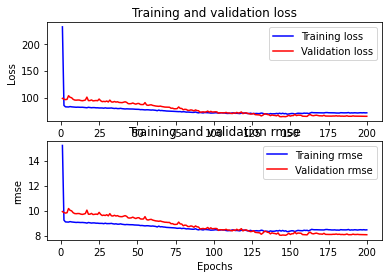

In [10]:
loss = result.history['loss']
val_loss = result.history['val_loss']
### loss와 val_loss를 그래프화
epochs = range(1, len(loss) + 1)
plt.subplot(211)  ## 2x1 개의 그래프 중에 1번째
plt.plot(epochs, loss, 'b-', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

### history에서 mean_absolute_error val_mean_absolute_error key를 가지는 값들만 추출
rmse = result.history['root_mean_squared_error']
val_rmse = result.history['val_root_mean_squared_error']
epochs = range(1, len(rmse) + 1)
### mean_absolute_error val_mean_absolute_error key를 그래프화
plt.subplot(212)  ## 2x1 개의 그래프 중에 2번째
plt.plot(epochs, rmse, 'b-', label='Training rmse')
plt.plot(epochs, val_rmse, 'r', label='Validation rmse')
plt.title('Training and validation rmse')
plt.xlabel('Epochs')
plt.ylabel('rmse')
plt.legend()

print("\n Test rmse: %.4f" % (model.evaluate(x_test, y_test)[1]))

plt.show()

# One hot encoding

In [15]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [12]:
data = pd.read_csv('/content/drive/MyDrive/영우_4기_딥러닝/dataset/one_hot_encording_test.csv', names = ["length", "width", "height", "volume", "class_name"])

In [13]:
x_data = data.copy()
y_data = x_data.pop('class_name')

print("data value : {}".format(x_data))
print("data Label : {}".format(y_data))

data value :     length  width  height  volume
0      5.1    0.5     1.4    0.02
1      4.9    0.2     1.4    0.03
2      4.7    0.2     1.3    0.04
3      4.6    0.1     1.5    0.05
4      5.0    0.6     1.4    0.02
5      5.4    0.9     1.7    0.03
6      4.6    0.4     1.4    0.33
7      5.0    0.4     1.5    0.12
8      4.4    0.9     1.4    0.12
9      3.9    0.1     1.5    0.21
10     2.2    0.5     1.4    0.03
11     4.2    0.0     1.4    0.02
12     5.1    0.2     1.3    0.05
13     4.2    0.1     1.5    0.06
14     2.0    0.6     1.4    0.07
15     4.4    0.9     1.7    0.08
16     7.6    0.4     1.4    0.02
17     8.0    0.4     1.5    0.09
18     6.4    0.9     1.4    0.04
19     5.9    0.1     1.5    0.02
data Label : 0        car
1        car
2        car
3      truck
4      truck
5      truck
6        bus
7     person
8     person
9        bus
10       car
11       car
12       car
13     truck
14     truck
15     truck
16       bus
17    person
18    person
19       bus


In [16]:
# case 1) sklearn
# Label Encoder는 독립 변수가 아닌 종속 변수(라벨)에 대해 사용한다. 
# 문자열이나 정수로된 라벨 값을  0  ~  K−1 까지의 정수로 변환.

e = LabelEncoder()
e.fit(y_data)
print("Label Class String : {}".format(e.classes_))

Y = e.transform(y_data)
print("Label Class int : {}".format(Y))

y_encoded = tf.keras.utils.to_categorical(Y)
print("case 1 One hot label class : {}".format(y_encoded))

print(np.argmax(y_encoded, axis=1).reshape(-1,1)) 
print(y_encoded.shape)

Label Class String : ['bus' 'car' 'person' 'truck']
Label Class int : [1 1 1 3 3 3 0 2 2 0 1 1 1 3 3 3 0 2 2 0]
case 1 One hot label class : [[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]
[[1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [0]
 [2]
 [2]
 [0]
 [1]
 [1]
 [1]
 [3]
 [3]
 [3]
 [0]
 [2]
 [2]
 [0]]
(20, 4)


In [17]:
# case 2) pandas
one_hot_label = pd.get_dummies(y_data)
print("case2 one_hot_label : ", one_hot_label)
print(one_hot_label.shape)

case2 one_hot_label :      bus  car  person  truck
0     0    1       0      0
1     0    1       0      0
2     0    1       0      0
3     0    0       0      1
4     0    0       0      1
5     0    0       0      1
6     1    0       0      0
7     0    0       1      0
8     0    0       1      0
9     1    0       0      0
10    0    1       0      0
11    0    1       0      0
12    0    1       0      0
13    0    0       0      1
14    0    0       0      1
15    0    0       0      1
16    1    0       0      0
17    0    0       1      0
18    0    0       1      0
19    1    0       0      0
(20, 4)
